# "[NeuralNetwork] Computational Unit - Rosenblatt's Perceptron"
> KNU AIR week4

- toc: false
- badges: false
- comments: false
- categories: [computational unit]
- hide_{github,colab,binder,deepnote}_badge: true

__Content creators:__ HEESUNG YANG

__Content reviewers:__ 

# 1. Overview
- First model for supervised neural network, in 1957
- Single-layer single-output neural network for binary classification of linearly separable dataset
- Model :

$
\text{For} \,\ \mathbf{x} = [+1, \,\ x_1, \,\ \cdots, \,\ x_m]^T \,\ \text{and} \,\ \mathbf{w} = [b, \,\ w_1, \,\ \cdots, \,\ w_m]^T
$

$$
\hat{y} = sgn(\mathbf{w}^T \mathbf{x}) \quad \text{where} \,\ {+1} \,\ \text{is positive, and} \,\ \text{-1} \,\ \text{is negative predicts.}
$$

- Learning : 
$$
\mathbf{w}^* = \underset{\mathbf{w}}{\arg\min} \sum_{\mathbf{x} \in \mathcal{H}} | \mathbf{w}^T \mathbf{x} | \quad \text{where} \,\ \mathcal{H} \,\ \text{is set of misclassified samples.}
$$


- Weights update :

$$
\Delta \mathbf{w} = \eta (y - \hat{y}) \mathbf{x}
$$

------------------------

# 2. Example

XOR Problem

In [80]:
import numpy as np

# XOR truth table
X = np.array([[1, 0, 0],
             [1, 0, 1],
             [1, 1, 0],
             [1, 1, 1]]) # first column is +1 (bias multiplicated)
yy = np.array([-1, 1, 1, -1]).T

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

def init_parameters():
    ww = np.random.rand(3) # first column is bias
    return ww

def model(ww, xx):
    return 1 if ww.T@xx >= 0 else -1

def train(ww, X, y, learning_rate, start_epoch, num_epoch):
    num_data = X.shape[0]
    ax = plt.subplots()
    for epoch in range(num_epoch):
        # SGD context
        for i in range(num_data):
            y_pred = model(ww, X[i, :])
            ww = ww + learning_rate*(y[i] - y_pred)*X[i, :]
        print(f'[EPOCH {start_epoch + epoch}] weights ', ww)
    return ww

def visualize(ww, X, y, title):
    ax = plt.subplot()
    # set plot
    ax.set_title(title)
    ax.set_xlim((-0.5, 1.5))
    ax.set_ylim((-0.5, 1.5))
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    
    # Scatter
    [ax.scatter(X[i, 1], X[i, 2], c='red') for i in range(X.shape[0]) if y[i] == 1]
    [ax.scatter(X[i, 1], X[i, 2], c='blue') for i in range(X.shape[0]) if y[i] == -1]
    
    # Dicision boundary
    # ww[0] + ww[1]*x + ww[2]*y = 0
    xlins = np.linspace(-2, 2, 2)
    ylins = -ww[0]/ww[2] - ww[1]*xlins/ww[2]
    ax.plot(xlins, ylins, c='black')

### Result

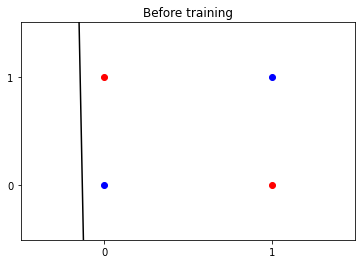

In [141]:
ww = init_parameters()
visualize(ww, X, yy, "Before training")

[EPOCH 0] weights  [ 0.04599641  0.63590948 -0.01149363]
[EPOCH 1] weights  [ 0.00599641  0.61590948 -0.03149363]
[EPOCH 2] weights  [-0.01400359  0.59590948 -0.03149363]


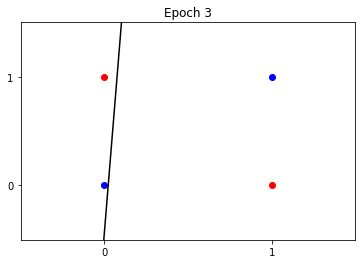

In [142]:
ww = train(ww, X, yy, 0.01, 0, 3)
visualize(ww, X, yy, "Epoch 3")

[EPOCH 3] weights  [-0.01400359  0.57590948 -0.03149363]
[EPOCH 4] weights  [-0.01400359  0.55590948 -0.03149363]
[EPOCH 5] weights  [-0.01400359  0.53590948 -0.03149363]
[EPOCH 6] weights  [-0.01400359  0.51590948 -0.03149363]
[EPOCH 7] weights  [-0.01400359  0.49590948 -0.03149363]
[EPOCH 8] weights  [-0.01400359  0.47590948 -0.03149363]
[EPOCH 9] weights  [-0.01400359  0.45590948 -0.03149363]


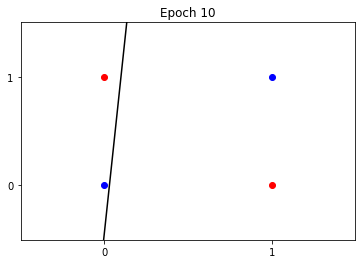

In [143]:
ww = train(ww, X, yy, 0.01, 3, 7)
visualize(ww, X, yy, "Epoch 10")

[EPOCH 10] weights  [-0.01400359  0.43590948 -0.03149363]
[EPOCH 11] weights  [-0.01400359  0.41590948 -0.03149363]
[EPOCH 12] weights  [-0.01400359  0.39590948 -0.03149363]
[EPOCH 13] weights  [-0.01400359  0.37590948 -0.03149363]
[EPOCH 14] weights  [-0.01400359  0.35590948 -0.03149363]
[EPOCH 15] weights  [-0.01400359  0.33590948 -0.03149363]
[EPOCH 16] weights  [-0.01400359  0.31590948 -0.03149363]
[EPOCH 17] weights  [-0.01400359  0.29590948 -0.03149363]
[EPOCH 18] weights  [-0.01400359  0.27590948 -0.03149363]
[EPOCH 19] weights  [-0.01400359  0.25590948 -0.03149363]
[EPOCH 20] weights  [-0.01400359  0.23590948 -0.03149363]
[EPOCH 21] weights  [-0.01400359  0.21590948 -0.03149363]
[EPOCH 22] weights  [-0.01400359  0.19590948 -0.03149363]
[EPOCH 23] weights  [-0.01400359  0.17590948 -0.03149363]
[EPOCH 24] weights  [-0.01400359  0.15590948 -0.03149363]
[EPOCH 25] weights  [-0.01400359  0.13590948 -0.03149363]
[EPOCH 26] weights  [-0.01400359  0.11590948 -0.03149363]
[EPOCH 27] wei

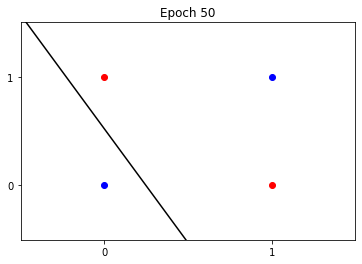

In [144]:
ww = train(ww, X, yy, 0.01, 10, 40)
visualize(ww, X, yy, "Epoch 50")